# Figure 14 and 15: Pressure-temperature evolution

1D Simulation Results

Pressure and temperature decay in the exterior nebular shock





In [1]:
%run import-modules-grid

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

from copy import deepcopy

!jupyter --version

G=6.6743e-11 # N m2/kg 

import numpy as np
import pickle
import pandas as pd

plt.rcParams.update(plt.rcParamsDefault)

#ORIGDATA=True # read in original pyko data and make pickle file with extracted data
ORIGDATA=False # read in pickled extracted ata


Platform:  Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:24 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6030
python version:  3.11.10
matplotlib version:  3.9.2
hvplot version:  0.11.0
numpy version:  2.1.2
pandas version:  2.2.3
pickle version:  4.0
yaml version:  6.0.2
pint version:  0.24.3
pyko version:  v0.8.3-dev-2024-05-12
print eos_table version:  v1.1.5b

Number of CPUs in the system: 12


Selected Jupyter core packages...
IPython          : 8.28.0
ipykernel        : 6.29.5
ipywidgets       : 8.1.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.14.2
jupyterlab       : 4.2.5
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.3


In [2]:
class decay_class:
    """Class to hold exterior shock decay data."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.pres = []   
        self.temp = []
        self.up = []
        self.pos = []
        self.time = []
        self.j = []
        self.tstall = []
        self.rstall = []
        self.label = []




def pyko_to_normal_panda(pkodata):
    df = pd.DataFrame({
            "j"    : pkodata.j.magnitude,
            "stepn" : pkodata.stepn.magnitude,
            "time" : pkodata.time.magnitude,
            "mat" : pkodata.mat.magnitude,
            "pos" : pkodata.pos.magnitude,
            "dr" : pkodata.dr.magnitude,
            "rho0" : pkodata.rho0.magnitude,
            "rho" : pkodata.rho.magnitude,
            "up" : pkodata.up.magnitude,
            "ie" : pkodata.ie.magnitude,
            "pres" : pkodata.pres.magnitude,
            "mass" : pkodata.mass.magnitude*4*np.pi, # correction needed for spherical true mass
            "temp" : pkodata.temp.magnitude,
            "cs" : pkodata.alocal.magnitude,
            "phase" : pkodata.phase.magnitude,
            "etot" : pkodata.etot.magnitude,
            "dtminj" : pkodata.dtminj.magnitude,
            "ent" : pkodata.entropy.magnitude,
            })
    return df

class plume_class:
    """Class to hold plume scaling data."""  # this is a documentation string for this class
    def __init__(self): # self is the default name of the object for internal referencing of the variables in the class
        """A function to initialize the class object.""" # this is a documentation string for this function
        self.rplumeinitarr = []   
        self.pinitarr    = []
        self.velinitarr = []
        self.einitarr  = []
        self.minitarr = []
        self.rhoinitarr = [] 
        self.rstallarr = []
        self.tstallarr = []
        self.vkearr = []
        self.labelneb  = []
        self.pneb  = []
        self.rhonebarr = []
        self.gammanebarr = []
        self.csnebarr = []
        self.frhonebref = []
        self.symarr = []
        self.cauchy = []
        self.pimass = []
        self.pitime = []
        self.piradius = []
#


In [3]:

if ORIGDATA:
    
    plume = plume_class()
    allens1 = []
    allens2 = []
    allens3 = []
    #
    # varying simulation conditions
    plume.rplumeinitarr = np.asarray([25.e3]) # m
    #plume.pinitarr = np.asarray([20.e9,40.e9,80.e9,120.e9,160.e9]) #Pa
    plume.pinitarr = np.asarray([15.e9,40.e9])
    plume.velinitarr = np.asarray([0.]) # m/s
    
    #plume.labelneb = ['$m_d/m_g$=1','$m_d/m_g$=100','$m_d/m_g$=10000']
    #plume.pneb = ['dg1','dg100','dg10000']
    plume.labelneb = ['$m_d/m_g$=1','$m_d/m_g$=100']
    plume.pneb = ['dg1','dg100']
    #plume.labelneb = ['$m_d/m_g$=100']
    #plume.pneb = ['dg100']
    plume.rhonebarr = np.asarray([4.e-07,2.02e-05,0.0020002]) # kg/m3
    plume.presnebarr = np.asarray([0.13668722,0.13668722,0.13668731]) # Pa
    plume.gammanebarr = np.asarray([ 1.35808424  , 1.03148229  , 1.00034143]) # dimless
    plume.csnebarr = np.sqrt(plume.gammanebarr*plume.presnebarr/plume.rhonebarr) # m/s
    plume.rhonebref = 1.406419e-11*1000. # kg/m3
    
    plume.symarr = ['o','x','+']
    
    nrp = len(plume.rplumeinitarr) # varying plume size
    npp = len(plume.pinitarr) # varying plume pressure
    nvp = len(plume.velinitarr) # varying initial velocity
    npn = len(plume.pneb) # varying nebula properties; nebula pressure or nebular dust
    
    plume.einitarr = np.zeros([npp,nrp])
    plume.minitarr = np.zeros([npp,nrp])
    plume.rhoinitarr = np.zeros([npp,nrp])
    plume.rstallarr = np.zeros([npp,nrp,npn])
    plume.tstallarr = np.zeros([npp,nrp,npn])
    plume.cauchy = np.zeros([npp,nrp,npn])
    plume.pimass = np.zeros([npp,nrp,npn])
    plume.pitime = np.zeros([npp,nrp,npn])
    plume.piradius = np.zeros([npp,nrp,npn])
    plume.vkearr = np.zeros([npp,nrp])
    
    for ineb in range(npn): # vary nebula
    #    fout='../pyko-sims/water-dig/vp-h2o-dig-tempgridlong-p1Pa-small2/vp-h2o-tempgridlong-'+plume.pneb[ineb]+'-'
        fout='./data/vp-h2o-tempgridlong-'+plume.pneb[ineb]+'-'
    #    if ineb > 0:
    #        fout='../pyko-sims/water-dig/vp-h2o-dig-tempgridlong-p1Pa-small2/vp-h2o-tempgridlong-'+plume.pneb[ineb]+'-150-'
        for ipp in range(npp): # vary plume pressure
            for irp in range(nrp): # vary plume radius
                for ivel in range(nvp):       # vary plume velocity     
                    fileid = 'P'+str(np.round(plume.pinitarr[ipp]/1.e9))+'-R'+str(np.round(plume.rplumeinitarr[irp]/1.e3))+'-V'+str(np.round(plume.velinitarr[ivel]/1.e3))
                    outputfilename = fout+fileid+'.dat'
                    stalloutputfilename = fout+fileid+'.dat-stall.one'
                    print('outputfile',outputfilename)
                    with open(outputfilename,"rb") as f:
                        pkodata = pickle.load(f) # keeps units
                    with open(stalloutputfilename,"rb") as f:
                        stallpkodata = pickle.load(f) # keeps units
                    if 0:
                        # print units
                        print('pyKO output file units are the same as the input file units:')
                        print('   Time        ',pkodata.time.units)
                        print('   Position    ',pkodata.pos.units)
                        print('   Density     ',pkodata.rho.units)
                        print('   Part. vel.  ',pkodata.up.units)
                        print('   Int. energy ',pkodata.ie.units)
                        print('   Mass        ',pkodata.mass.units)
                        print('   Temperature ',pkodata.temp.units)
                        print('   Sound speed ',pkodata.alocal.units)
                        print('   Pressure    ',pkodata.pres.units)
                        print('   Stress      ',pkodata.sigmar.units)
                        print('   Sp. Entropy ',pkodata.entropy.units)
                    #jmaxmat1=max(np.where(pkodata.mat.magnitude==1)[0])
                    pko = pyko_to_normal_panda(pkodata)
                    stallpko = pyko_to_normal_panda(stallpkodata)
                    imat1 = np.where((pko['mat'] == 1))[0]
                    etotal = np.sum(pko['ie'][imat1]*pko['mass'][imat1])
                    mtotal = np.sum(pko['mass'][imat1])
                    #print('Etotal (J) = ',etotal)
                    plume.einitarr[ipp,irp]=etotal
                    plume.minitarr[ipp,irp]=mtotal
                    plume.rhoinitarr[ipp,irp]=pko['rho'][imat1[0]]
                    plume.vkearr[ipp,irp] = np.sqrt(etotal*2/mtotal)
                    # stall info
                    plume.rstallarr[ipp,irp,ineb] = np.max(stallpko['pos'][np.max(imat1)])
                    plume.tstallarr[ipp,irp,ineb] = stallpko['time'][0]
                    # cauchy number
                    plume.cauchy[ipp,irp,ineb] = (etotal*2/mtotal)/(plume.csnebarr[ineb]*plume.csnebarr[ineb])
                    mstall = (4/3*np.pi)*plume.rhonebarr[ineb]*np.power(plume.rstallarr[ipp,irp,ineb],3)
                    plume.pimass[ipp,irp,ineb] = mstall/mtotal
                    plume.pitime[ipp,irp,ineb] = plume.vkearr[ipp,irp]*plume.tstallarr[ipp,irp,ineb]/plume.rplumeinitarr[irp]
                    plume.piradius[ipp,irp,ineb] = plume.rstallarr[ipp,irp,ineb] / plume.rplumeinitarr[irp]
    
                    # read in decay time data
                    modval=1
                    with open(outputfilename,"rb") as f:
                        pkodata = pickle.load(f) # keeps units
                        pko = pyko_to_normal_panda(pkodata)
                        count=0
                        print('stall time',pkodata.time[0].magnitude,stallpko['time'][0])
                        while True:
                            try:
                                #print(count)
                                pkodata = pickle.load(f) # keeps units but only one snapshot at a time
                                if (count % modval)==0:
                                    pko = pd.concat([pko,pyko_to_normal_panda(pkodata)],ignore_index=True) # strips units for plotting
                                    #print(count,pkodata.time[0],stallpko['time'][0])
                                count=count+1
                                #if pkodata.time[0].magnitude>stallpko['time'][0]:
                                #    break
                                if pkodata.time[0].magnitude>1800:
                                    modval=2
                                #    break
                            except:
                                break        
                    #print(len(pko['time']))
                    ens1 = decay_class()
                    ens2 = decay_class()
                    ens3 = decay_class()
                    imat2 = np.where((pko['mat'] == 2))[0]
                    #print(pko['j'][imat2[10]])
                    imat2b = np.where((pko['mat'] == 2) & (pko['time']==0) & (pko['pos']>0.5*np.max(stallpko['pos'][np.max(imat1)])))[0]
                    imat2c = np.where((pko['mat'] == 2) & (pko['time']==0) & (pko['pos']>1*np.max(stallpko['pos'][np.max(imat1)])))[0]
                    #print(pko['j'][imat2b[0]])
                    #print(pko['pos'][imat2b[0]])
                    #print(np.max(stallpko['pos'][np.max(imat1)]))
                    ens1.j = pko['j'][imat2[0]]
                    ens2.j = pko['j'][imat2b[0]]
                    ens3.j = pko['j'][imat2c[0]]
                    ens1.tstall = plume.tstallarr[ipp,irp,ineb]
                    ens1.rstall = plume.rstallarr[ipp,irp,ineb]
                    ens1.time = np.asarray(pko['time'][pko['j']==ens1.j])
                    ens1.pos = np.asarray(pko['pos'][pko['j']==ens1.j])
                    ens1.pres = np.asarray(pko['pres'][pko['j']==ens1.j])
                    ens1.temp = np.asarray(pko['temp'][pko['j']==ens1.j])
                    ens1.up = np.asarray(pko['up'][pko['j']==ens1.j])
                    ens2.tstall = plume.tstallarr[ipp,irp,ineb]
                    ens2.rstall = plume.rstallarr[ipp,irp,ineb]
                    ens2.time = np.asarray(pko['time'][pko['j']==ens2.j])
                    ens2.pos = np.asarray(pko['pos'][pko['j']==ens2.j])
                    ens2.pres = np.asarray(pko['pres'][pko['j']==ens2.j])
                    ens2.temp = np.asarray(pko['temp'][pko['j']==ens2.j])
                    ens2.up = np.asarray(pko['up'][pko['j']==ens2.j])
                    ens3.tstall = plume.tstallarr[ipp,irp,ineb]
                    ens3.rstall = plume.rstallarr[ipp,irp,ineb]
                    ens3.time = np.asarray(pko['time'][pko['j']==ens3.j])
                    ens3.pos = np.asarray(pko['pos'][pko['j']==ens3.j])
                    ens3.pres = np.asarray(pko['pres'][pko['j']==ens3.j])
                    ens3.temp = np.asarray(pko['temp'][pko['j']==ens3.j])
                    ens3.up = np.asarray(pko['up'][pko['j']==ens3.j])
    
                    ens1.label=str(plume.pinitarr[ipp]/1.e9)+' GPa, '+plume.pneb[ineb]
                    ens2.label=str(plume.pinitarr[ipp]/1.e9)+' GPa, '+plume.pneb[ineb]
                    ens3.label=str(plume.pinitarr[ipp]/1.e9)+' GPa, '+plume.pneb[ineb]
    
                    allens1.append(ens1)
                    allens2.append(ens2)
                    allens3.append(ens3)
    #print(len(ens1.time))
    #print(len(ens2.time))
    #print(len(ens3.time))
    
    outputfilename='./data/volume-data.pkl'
    with open(outputfilename,"wb") as f:
        pickle.dump([allens1,allens2,allens3],f)
    

In [4]:
if not ORIGDATA:
    outputfilename='./data/volume-data.pkl'
    with open(outputfilename,"rb") as f:
        [allens1,allens2,allens3] = pickle.load(f)


In [5]:
## fix labels
print(allens1[0].label)
tmp = allens1[0].label[0:-3]+'$m_d/m_g=1$'
print(tmp)
allens1[0].label=tmp
i=1
print(allens1[i].label)
tmp = allens1[i].label[0:-3]+'$m_d/m_g=1$'
print(tmp)
allens1[i].label=tmp
i=2
print(allens1[i].label)
tmp = allens1[i].label[0:-5]+'$m_d/m_g=100$'
print(tmp)
allens1[i].label=tmp
i=3
print(allens1[i].label)
tmp = allens1[i].label[0:-5]+'$m_d/m_g=100$'
print(tmp)
allens1[i].label=tmp

15.0 GPa, dg1
15.0 GPa, $m_d/m_g=1$
40.0 GPa, dg1
40.0 GPa, $m_d/m_g=1$
15.0 GPa, dg100
15.0 GPa, $m_d/m_g=100$
40.0 GPa, dg100
40.0 GPa, $m_d/m_g=100$


(np.float64(-2.4666574346019696), np.float64(66.09980612664135)) [-0.16488587  4.41849913]
(np.float64(-2.4666574346019696), np.float64(66.09980612664135)) [-0.16488587  4.41849913]
(np.float64(-1.238510685020639), np.float64(32.058724385433415)) [-0.08278933  2.14299336]
(np.float64(-1.238510685020639), np.float64(32.058724385433415)) [-0.08278933  2.14299336]
(np.float64(-3.5250126648876203), np.float64(88.32526596264002)) [-0.23563254  5.90417935]
(np.float64(-3.5250126648876203), np.float64(88.32526596264002)) [-0.23563254  5.90417935]
(np.float64(-1.4642321391430198), np.float64(36.798874922003414)) [-0.09787787  2.45985285]
(np.float64(-1.4642321391430198), np.float64(36.798874922003414)) [-0.09787787  2.45985285]


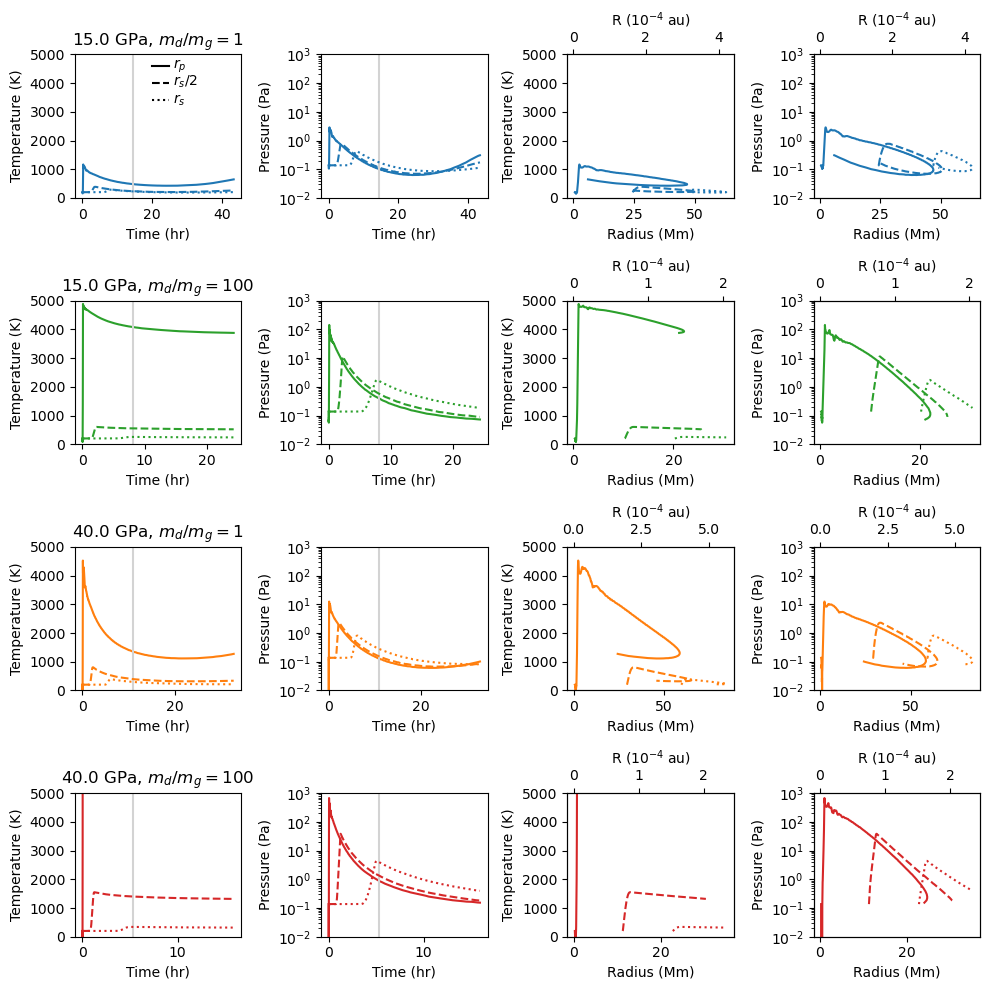

In [6]:
plt.rcParams.update(plt.rcParamsDefault)
figure, ax = plt.subplots(4, 4,figsize=(10,10)) 
#plt.rcParams.update({'font.size': 12})
au2m=149597870700
fll=8
pcol = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#pcol1 = ["#5790fc", "#f89c20", "#e42536", "#964a8b"]
#pcol = pcol1[::-1]

#for ii in range(0,len(allens1)):
i=0
for ii in range(0,1):
    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii])#,label=allens1[ii].label)
    ax[i,1].plot(allens1[ii].time/3600,allens1[ii].pres,color=pcol[ii])
    ax[i,2].plot(allens1[ii].pos/1.e6,allens1[ii].temp,color=pcol[ii])
    ax[i,3].plot(allens1[ii].pos/1.e6,allens1[ii].pres,color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')

    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,1].plot(allens2[ii].time/3600,allens2[ii].pres,'--',color=pcol[ii])
    ax[i,2].plot(allens2[ii].pos/1.e6,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,3].plot(allens2[ii].pos/1.e6,allens2[ii].pres,'--',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    ax[i,1].plot(allens3[ii].time/3600,allens3[ii].pres,':',color=pcol[ii])
    ax[i,2].plot(allens3[ii].pos/1.e6,allens3[ii].temp,':',color=pcol[ii])
    ax[i,3].plot(allens3[ii].pos/1.e6,allens3[ii].pres,':',color=pcol[ii])

tmp = np.asarray(ax[i,3].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,3].get_xlim(),tmp)
ax01 = ax[i,3].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

tmp = np.asarray(ax[i,2].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,2].get_xlim(),tmp)
ax01 = ax[i,2].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

ax[i,0].plot([20,25],[4600,4600],'k-')
ax[i,0].text(26,4500,'$r_p$')
ax[i,0].plot([20,25],[4000,4000],'k--')
ax[i,0].text(26,3900,'$r_s/2$')
ax[i,0].plot([20,25],[3400,3400],'k:')
ax[i,0].text(26,3300,'$r_s$')

ax[i,0].set_title(allens1[0].label)
ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,5000)
#ax[i,0].legend(fontsize=fll)
#ax[i,1].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('Pressure (Pa)')
ax[i,1].set_ylim(0.01,1.e3)
ax[i,1].set_yscale('log')


ax[i,2].set_xlabel('Radius (Mm)')
ax[i,2].set_ylabel('Temperature (K)')
ax[i,2].set_ylim(0,5000)

ax[i,3].set_xlabel('Radius (Mm)')
ax[i,3].set_ylabel('Pressure (Pa)')
ax[i,3].set_yscale('log')
ax[i,3].set_ylim(0.01,1.e3)


i=1
for ii in range(2,3):
    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii])#,label=allens1[ii].label)
    ax[i,1].plot(allens1[ii].time/3600,allens1[ii].pres,color=pcol[ii])
    ax[i,2].plot(allens1[ii].pos/1.e6,allens1[ii].temp,color=pcol[ii])
    ax[i,3].plot(allens1[ii].pos/1.e6,allens1[ii].pres,color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    

    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,1].plot(allens2[ii].time/3600,allens2[ii].pres,'--',color=pcol[ii])
    ax[i,2].plot(allens2[ii].pos/1.e6,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,3].plot(allens2[ii].pos/1.e6,allens2[ii].pres,'--',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    ax[i,1].plot(allens3[ii].time/3600,allens3[ii].pres,':',color=pcol[ii])
    ax[i,2].plot(allens3[ii].pos/1.e6,allens3[ii].temp,':',color=pcol[ii])
    ax[i,3].plot(allens3[ii].pos/1.e6,allens3[ii].pres,':',color=pcol[ii])

tmp = np.asarray(ax[i,3].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,3].get_xlim(),tmp)
ax01 = ax[i,3].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

tmp = np.asarray(ax[i,2].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,2].get_xlim(),tmp)
ax01 = ax[i,2].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

ax[i,0].set_title(allens1[2].label)
ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,5000)
#ax[i,0].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)
#ax[i,0].legend(fontsize=fll)

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('Pressure (Pa)')
ax[i,1].set_ylim(0.01,1.e3)
ax[i,1].set_yscale('log')


ax[i,2].set_xlabel('Radius (Mm)')
ax[i,2].set_ylabel('Temperature (K)')
ax[i,2].set_ylim(0,5000)

ax[i,3].set_xlabel('Radius (Mm)')
ax[i,3].set_ylabel('Pressure (Pa)')
ax[i,3].set_yscale('log')
ax[i,3].set_ylim(0.01,1.e3)



i=2
for ii in range(1,2):
    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii],label=allens1[ii].label)
    ax[i,1].plot(allens1[ii].time/3600,allens1[ii].pres,color=pcol[ii])
    ax[i,2].plot(allens1[ii].pos/1.e6,allens1[ii].temp,color=pcol[ii])
    ax[i,3].plot(allens1[ii].pos/1.e6,allens1[ii].pres,color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    

    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,1].plot(allens2[ii].time/3600,allens2[ii].pres,'--',color=pcol[ii])
    ax[i,2].plot(allens2[ii].pos/1.e6,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,3].plot(allens2[ii].pos/1.e6,allens2[ii].pres,'--',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    ax[i,1].plot(allens3[ii].time/3600,allens3[ii].pres,':',color=pcol[ii])
    ax[i,2].plot(allens3[ii].pos/1.e6,allens3[ii].temp,':',color=pcol[ii])
    ax[i,3].plot(allens3[ii].pos/1.e6,allens3[ii].pres,':',color=pcol[ii])

tmp = np.asarray(ax[i,3].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,3].get_xlim(),tmp)
ax01 = ax[i,3].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

tmp = np.asarray(ax[i,2].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,2].get_xlim(),tmp)
ax01 = ax[i,2].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

ax[i,0].set_title(allens1[1].label)
ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,5000)
#ax[i,0].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)
#ax[i,0].legend(fontsize=fll)

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('Pressure (Pa)')
ax[i,1].set_ylim(0.01,1.e3)
ax[i,1].set_yscale('log')


ax[i,2].set_xlabel('Radius (Mm)')
ax[i,2].set_ylabel('Temperature (K)')
ax[i,2].set_ylim(0,5000)

ax[i,3].set_xlabel('Radius (Mm)')
ax[i,3].set_ylabel('Pressure (Pa)')
ax[i,3].set_yscale('log')
ax[i,3].set_ylim(0.01,1.e3)



i=3
for ii in range(3,4):
    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii])#,label=allens1[ii].label)
    ax[i,1].plot(allens1[ii].time/3600,allens1[ii].pres,color=pcol[ii])
    ax[i,2].plot(allens1[ii].pos/1.e6,allens1[ii].temp,color=pcol[ii])
    ax[i,3].plot(allens1[ii].pos/1.e6,allens1[ii].pres,color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    

    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,1].plot(allens2[ii].time/3600,allens2[ii].pres,'--',color=pcol[ii])
    ax[i,2].plot(allens2[ii].pos/1.e6,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,3].plot(allens2[ii].pos/1.e6,allens2[ii].pres,'--',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    ax[i,1].plot(allens3[ii].time/3600,allens3[ii].pres,':',color=pcol[ii])
    ax[i,2].plot(allens3[ii].pos/1.e6,allens3[ii].temp,':',color=pcol[ii])
    ax[i,3].plot(allens3[ii].pos/1.e6,allens3[ii].pres,':',color=pcol[ii])

tmp = np.asarray(ax[i,3].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,3].get_xlim(),tmp)
ax01 = ax[i,3].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

tmp = np.asarray(ax[i,2].get_xlim())/au2m*1.e4*1.e6 # Mm-> m -> AU -> 1.e-4 AU
print(ax[i,2].get_xlim(),tmp)
ax01 = ax[i,2].twiny()
ax01.set_xlim(tmp)
ax01.set_xlabel('R (10$^{-4}$ au)')

ax[i,0].set_title(allens1[3].label)
ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,5000)
#ax[i,0].legend('upper-right',fontsize=12)
#ax[i,0].legend(fontsize=fll)

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('Pressure (Pa)')
ax[i,1].set_ylim(0.01,1.e3)
ax[i,1].set_yscale('log')


ax[i,2].set_xlabel('Radius (Mm)')
ax[i,2].set_ylabel('Temperature (K)')
ax[i,2].set_ylim(0,5000)

ax[i,3].set_xlabel('Radius (Mm)')
ax[i,3].set_ylabel('Pressure (Pa)')
ax[i,3].set_yscale('log')
ax[i,3].set_ylim(0.01,1.e3)

plt.tight_layout()
plt.savefig('./plots/Fig14-P-T-v3.pdf')

In [7]:
plt.show()

In [8]:
plt.rcParams.update(plt.rcParamsDefault)
figure, ax = plt.subplots(4, 2,figsize=(7,10)) 
#plt.rcParams.update({'font.size': 12})

samp=60
pcol = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

#kernel = [1, 2, 3, 4,5 ,6,7,8,9,10,11,12,13,14]
kernel = [1, 2, 3, 4]#,5 ,6,7,8,9,10,11,12,13,14]
#for ii in range(0,len(allens1)):
i=0
for ii in range(0,1):
#    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii],label=allens1[ii].label)
    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii])#,label='15 GPa $m_d/m_g=1$')
    ax[i,0].text(2.9*allens1[ii].tstall/3600,1000,'15 GPa $m_d/m_g=1$',ha='right')
    #sm_temp = np.convolve(allens1[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens1[ii].time/3600,-np.gradient(sm_temp,allens1[ii].time/3600),'.',color=pcol[ii])

    rate = -np.gradient(allens1[ii].temp,allens1[ii].time/3600)
    ax[i,1].plot(allens1[ii].time[::samp]/3600,rate[::samp],'.',color=pcol[ii])

    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    #ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')

    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    #sm_temp = np.convolve(allens2[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens2[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens2[ii].temp,allens2[ii].time/3600)
    ax[i,1].plot(allens2[ii].time[::samp]/3600,rate[::samp],'2',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    #sm_temp = np.convolve(allens3[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens3[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens3[ii].temp,allens3[ii].time/3600)
    ax[i,1].plot(allens3[ii].time[::samp]/3600,rate[::samp],'_',color=pcol[ii])

ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,1300)
#ax[i,0].legend()
#ax[i,1].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('-dT/dt (K/hr)')
ax[i,1].set_ylim(1,10000)
ax[i,1].set_yscale('log')




i=1
for ii in range(2,3):
    #ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii],label=allens1[ii].label)
    #sm_temp = np.convolve(allens1[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens1[ii].time/3600,-np.gradient(sm_temp,allens1[ii].time/3600),'.',color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    #ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')


#    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii],label=allens1[ii].label)
    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])#,label='15 GPa $m_d/m_g=100$')
    ax[i,0].text(2.9*allens1[ii].tstall/3600,1000,'15 GPa $m_d/m_g=100$',ha='right')
    #sm_temp = np.convolve(allens2[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens2[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens2[ii].temp,allens2[ii].time/3600)
    ax[i,1].plot(allens2[ii].time[::samp]/3600,rate[::samp],'2',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    #sm_temp = np.convolve(allens3[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens3[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens3[ii].temp,allens3[ii].time/3600)
    ax[i,1].plot(allens3[ii].time[::samp]/3600,rate[::samp],'_',color=pcol[ii])

ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,1300)
#ax[i,0].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)
#ax[i,0].legend()

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('-dT/dt (K/hr)')
ax[i,1].set_ylim(1,1000)
ax[i,1].set_yscale('log')



i=2
for ii in range(1,2):
#    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii],label=allens1[ii].label)
    ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii])#,label='40 GPa $m_d/m_g=1$')
    ax[i,0].text(2.9*allens1[ii].tstall/3600,1700,'40 GPa $m_d/m_g=1$',ha='right')
    #sm_temp = np.convolve(allens1[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens1[ii].time/3600,-np.gradient(sm_temp,allens1[ii].time/3600),'.',color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    #ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    rate = -np.gradient(allens1[ii].temp,allens1[ii].time/3600)
    ax[i,1].plot(allens1[ii].time[::samp]/3600,rate[::samp],'.',color=pcol[ii])
    

    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    #sm_temp = np.convolve(allens2[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens2[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens2[ii].temp,allens2[ii].time/3600)
    ax[i,1].plot(allens2[ii].time[::samp]/3600,rate[::samp],'2',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    #sm_temp = np.convolve(allens3[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens3[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens3[ii].temp,allens3[ii].time/3600)
    ax[i,1].plot(allens3[ii].time[::samp]/3600,rate[::samp],'_',color=pcol[ii])

ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,2000)
#ax[i,0].legend(bbox_to_anchor= (1.01, 1.01),fontsize=12)
#ax[i,0].legend()

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('-dT/dt (K/hr)')
ax[i,1].set_ylim(1,10000)
ax[i,1].set_yscale('log')

i=3

for ii in range(3,4):
    #ax[i,0].plot(allens1[ii].time/3600,allens1[ii].temp,color=pcol[ii],label=allens1[ii].label)

    #sm_temp = np.convolve(allens1[ii].temp, kernel, mode='same')

    #ax[i,1].plot(allens1[ii].time/3600,-np.gradient(sm_temp,allens1[ii].time/3600),'.',color=pcol[ii])
    #ax[i,2].plot(allens1[ii].pos/1.e6,allens1[ii].temp,color=pcol[ii])
    #ax[i,3].plot(allens1[ii].pos/1.e6,allens1[ii].pres,color=pcol[ii])
    ax[i,0].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    #ax[i,1].plot([allens1[ii].tstall/3600,allens1[ii].tstall/3600],[0,5000],'-',color='lightgrey')
    

#    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii],label=allens1[ii].label)
    ax[i,0].plot(allens2[ii].time/3600,allens2[ii].temp,'--',color=pcol[ii])
    ax[i,0].text(2.9*allens1[ii].tstall/3600,1700,'40 GPa $m_d/m_g=100$',ha='right')
    #sm_temp = np.convolve(allens2[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens2[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens2[ii].temp,allens2[ii].time/3600)
    ax[i,1].plot(allens2[ii].time[::samp]/3600,rate[::samp],'2',color=pcol[ii])
#    ax[i,2].plot(allens2[ii].pos/1.e6,allens2[ii].temp,'--',color=pcol[ii])
#    ax[i,3].plot(allens2[ii].pos/1.e6,allens2[ii].pres,'--',color=pcol[ii])

    ax[i,0].plot(allens3[ii].time/3600,allens3[ii].temp,':',color=pcol[ii])
    #sm_temp = np.convolve(allens3[ii].temp, kernel, mode='same')
    #ax[i,1].plot(allens3[ii].time/3600,-np.gradient(sm_temp,allens2[ii].time/3600),'.',color=pcol[ii])
    rate = -np.gradient(allens3[ii].temp,allens3[ii].time/3600)
    ax[i,1].plot(allens3[ii].time[::samp]/3600,rate[::samp],'_',color=pcol[ii])
#    ax[i,1].plot(allens3[ii].time/3600,allens3[ii].pres,':',color=pcol[ii])
#    ax[i,2].plot(allens3[ii].pos/1.e6,allens3[ii].temp,':',color=pcol[ii])
#    ax[i,3].plot(allens3[ii].pos/1.e6,allens3[ii].pres,':',color=pcol[ii])

ax[i,0].set_xlabel('Time (hr)')
ax[i,0].set_ylabel('Temperature (K)')
ax[i,0].set_ylim(0,2000)
#ax[i,0].legend('upper-right',fontsize=12)
#ax[i,0].legend()

ax[i,1].set_xlabel('Time (hr)')
ax[i,1].set_ylabel('-dT/dt (K/hr)')
ax[i,1].set_ylim(1,10000)
ax[i,1].set_yscale('log')


plt.tight_layout()
plt.savefig('./plots/Fig15-P-T-grad-v2.pdf')

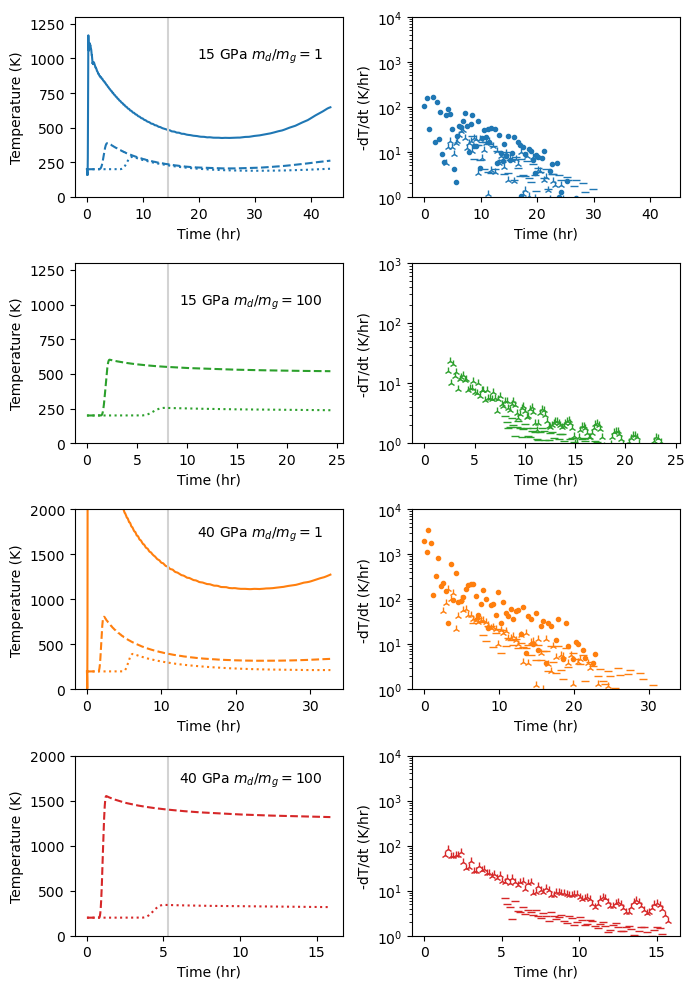

In [9]:
plt.show()